In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#getting the data
data = pd.read_csv('/content/children anemia.csv')
data.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [3]:
#Checking the data columns
data.columns

Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner', 'When child put to breast',
       'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Anemia level.1', 'Taking iron pills, sprinkles or syrup'],
      dtype='object')

The dataset contains multiple columns with demographic and health information, including:

**Demographics:** Age group, place of residence, education level, wealth index.

**Health-related factors:** Hemoglobin levels, anemia level, presence of a mosquito bed net, smoking status, iron intake.

**Maternal and child health:** Birth history, marital status, child feeding practices.

**EXPLORATORY DATA ANALYSIS AND DATA CLEANING**

1. BASIC DATA SUMMARY

In [4]:
# Checking for column data types, null values, and basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33924 entries, 0 to 33923
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   33924 non-null  object 
 1   Type of place of residence                                             33924 non-null  object 
 2   Highest educational level                                              33924 non-null  object 
 3   Wealth index combined                                                  33924 non-null  object 
 4   Births in last five years                                              33924 non-null  int64  
 5   Age of respondent at 1st birth                                         33924 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null 

In [5]:
#Checking the missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_data = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_data)

Columns with missing values:
 Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level                                                             20788
Currently residing with husband/partner                                   1698
When child put to breast                                                 12756
Had fever in last two weeks                                               3211
Hemoglobin level adjusted for altitude (g/dl - 1 decimal)                23742
Anemia level.1                                                           23742
Taking iron pills, sprinkles or syrup                                     3211
dtype: int64


In [6]:
# Displaying the percentage of missing values per column
missing_percentage = (missing_data / len(data)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)


Percentage of missing values per column:
 Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    61.278151
Anemia level                                                             61.278151
Currently residing with husband/partner                                   5.005306
When child put to breast                                                 37.601698
Had fever in last two weeks                                               9.465275
Hemoglobin level adjusted for altitude (g/dl - 1 decimal)                69.985851
Anemia level.1                                                           69.985851
Taking iron pills, sprinkles or syrup                                     9.465275
dtype: float64


In [7]:
# Checking the unique values in categorical columns to understand possible categories
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}:", data[col].unique())

Unique values in Age in 5-year groups: ['40-44' '35-39' '25-29' '20-24' '30-34' '15-19' '45-49']
Unique values in Type of place of residence: ['Urban' 'Rural']
Unique values in Highest educational level: ['Higher' 'Secondary' 'Primary' 'No education']
Unique values in Wealth index combined: ['Richest' 'Richer' 'Middle' 'Poorer' 'Poorest']
Unique values in Anemia level: [nan 'Moderate' 'Mild' 'Not anemic' 'Severe']
Unique values in Have mosquito bed net for sleeping (from household questionnaire): ['Yes' 'No']
Unique values in Smokes cigarettes: ['No' 'Yes']
Unique values in Current marital status: ['Living with partner' 'Married' 'No longer living together/separated'
 'Never in union' 'Widowed' 'Divorced']
Unique values in Currently residing with husband/partner: ['Staying elsewhere' 'Living with her' nan]
Unique values in When child put to breast: ['Immediately' 'Hours: 1' '105.0' nan 'Days: 1' '104.0' '103.0' '203.0'
 '102.0' '111.0' '106.0' '109.0' '202.0' '223.0' '120.0' '204.0' '2

**Findings from the Data Summary**

**Data Types:** The dataset consists of mostly categorical data (object types) and some numerical data (float64 for hemoglobin levels and int64 for age and birth-related columns).

**Missing Values:**
Columns related to health metrics, like hemoglobin levels and anemia status, have substantial missing data (Hemoglobin level adjusted for altitude and smoking and Anemia level).
Other columns, such as Currently residing with husband/partner, When child put to breast, and Had fever in last two weeks, also have significant missing values.

**Duplicated or Redundant Columns:** Anemia level and Anemia level.1 seem to contain similar information and may be duplicates.

2. DESCRIPTIVE STATISTICS

In [9]:
# Checking the Descriptive statistics for numerical columns
data.describe()

,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Hemoglobin level adjusted for altitude (g/dl - 1 decimal)
count,33924.000000,33924.000000,13136.000000,10182.000000
mean,1.823783,19.570776,114.367235,101.270183
std,0.705460,4.313172,15.915408,15.569583
min,1.000000,12.000000,20.000000,29.000000
25%,1.000000,16.000000,105.000000,92.000000
50%,2.000000,19.000000,115.000000,103.000000
75%,2.000000,22.000000,125.000000,112.000000
max,6.000000,48.000000,218.000000,170.000000


In [10]:
#Checking the Frequency counts for categorical columns
for col in categorical_cols:
    print(f"Value counts for {col}:\n", data[col].value_counts(), "\n")

Value counts for Age in 5-year groups:
 Age in 5-year groups
25-29    9470
30-34    7647
20-24    6626
35-39    5447
40-44    2407
15-19    1434
45-49     893
Name: count, dtype: int64 

Value counts for Type of place of residence:
 Type of place of residence
Rural    22225
Urban    11699
Name: count, dtype: int64 

Value counts for Highest educational level:
 Highest educational level
No education    15391
Secondary       10623
Primary          5274
Higher           2636
Name: count, dtype: int64 

Value counts for Wealth index combined:
 Wealth index combined
Poorest    8066
Poorer     7743
Middle     7171
Richer     6166
Richest    4778
Name: count, dtype: int64 

Value counts for Anemia level:
 Anemia level
Not anemic    5337
Moderate      3974
Mild          3594
Severe         231
Name: count, dtype: int64 

Value counts for Have mosquito bed net for sleeping (from household questionnaire):
 Have mosquito bed net for sleeping (from household questionnaire)
Yes    24016
No      990

**Key Observations from Descriptive Statistics**

**Numerical Columns:**

Births in last five years and Age of respondent at 1st birth have typical ranges. Most mothers had their first child between ages 16 and 22.
Hemoglobin levels have a broad range with mean values around 101–114 g/dL, indicating possible variations by health status or geographic factors (altitude adjustment).

**Categorical Columns:**

**Wealth and Education:** Many respondents fall into lower wealth and education categories, with about 45% having no formal education.
**Anemia and Bed Net Usage:** Anemia is common, and the majority report using mosquito nets.
**Smoking and Iron Intake:** Few respondents smoke, and most are not taking iron supplements.
**Child Feeding Practices:** The When child put to breast column has varied entries, some of which seem incorrectly labeled (e.g., numeric values like 105.0), suggesting potential data cleaning needs.

3. DATA CLEANING

In [11]:
#Removing Redundant Columns. e.g  Anemia level and Anemia level.1 appear to contain similar information.
data_cleaned = data.drop(columns=['Anemia level.1'])

In [12]:
#Handle Inconsistencies e.g The When child put to breast column has mixed entries (e.g., numbers that likely don't represent valid times).

# Keep entries labeled "Immediately", "Days: X", or "Hours: X" and set others to NaN
data_cleaned['When child put to breast'] = data_cleaned['When child put to breast'].apply(
    lambda x: x if isinstance(x, str) and ("Immediately" in x or "Days:" in x or "Hours:" in x) else None
)

In [13]:
#Checking the missing values
missing_values = data_cleaned.isnull().sum()

# Display columns with missing values
missing_data = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_data)

Columns with missing values:
 Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level                                                             20788
Currently residing with husband/partner                                   1698
When child put to breast                                                 19801
Had fever in last two weeks                                               3211
Hemoglobin level adjusted for altitude (g/dl - 1 decimal)                23742
Taking iron pills, sprinkles or syrup                                     3211
dtype: int64


In [14]:
#Impute columns with moderate missing values
# Categorical columns - use mode imputation
categorical_columns = ["When child put to breast", "Currently residing with husband/partner",
                       "Had fever in last two weeks", "Taking iron pills, sprinkles or syrup"]

for col in categorical_columns:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

In [15]:
# Making a copy
data = data_cleaned.copy()

In [17]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the following column
data['Age_encoded'] = label_encoder.fit_transform(data['Age in 5-year groups'])
data['Highest_educational_level_encoded'] = label_encoder.fit_transform(data['Highest educational level'])
data['Wealth index combined_encoded'] = label_encoder.fit_transform(data['Wealth index combined'])
data['Anemia level_encoded'] = label_encoder.fit_transform(data['Anemia level'])

In [18]:
#one-hot encoding

# Perform one-hot encoding on the following column
# Perform one-hot encoding for multiple columns
data_encoded = pd.get_dummies(data, columns=['Type of place of residence', 'Have mosquito bed net for sleeping (from household questionnaire)', 'Smokes cigarettes', 'Current marital status', 'Currently residing with husband/partner', 'Had fever in last two weeks','When child put to breast', 'Taking iron pills, sprinkles or syrup'], drop_first=True)

In [19]:
data_encoded.columns

Index(['Age in 5-year groups', 'Highest educational level',
       'Wealth index combined', 'Births in last five years',
       'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Age_encoded', 'Highest_educational_level_encoded',
       'Wealth index combined_encoded', 'Anemia level_encoded',
       'Type of place of residence_Urban',
       'Have mosquito bed net for sleeping (from household questionnaire)_Yes',
       'Smokes cigarettes_Yes', 'Current marital status_Living with partner',
       'Current marital status_Married',
       'Current marital status_Never in union',
       'Current marital status_No longer living together/separated',
       'Current marital status_Widowed',
       'Currently residing with husband/partner_Staying elsewhere',
       'Had fever in last two weeks_No', 'Had fever in last two weeks_Yes',


In [20]:
data = data_encoded[['Births in last five years',
       'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Age_encoded', 'Highest_educational_level_encoded',
       'Wealth index combined_encoded', 'Anemia level_encoded',
       'Type of place of residence_Urban',
       'Have mosquito bed net for sleeping (from household questionnaire)_Yes',
       'Smokes cigarettes_Yes', 'Current marital status_Living with partner',
       'Current marital status_Married',
       'Current marital status_Never in union',
       'Current marital status_No longer living together/separated',
       'Current marital status_Widowed',
       'Currently residing with husband/partner_Staying elsewhere',
       'Had fever in last two weeks_No', 'Had fever in last two weeks_Yes', 'When child put to breast_Hours: 1', 'When child put to breast_Immediately',
       'Taking iron pills, sprinkles or syrup_No',
       'Taking iron pills, sprinkles or syrup_Yes']]

In [21]:
from sklearn.impute import KNNImputer

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can tune n_neighbors

# Apply KNN imputation
df = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

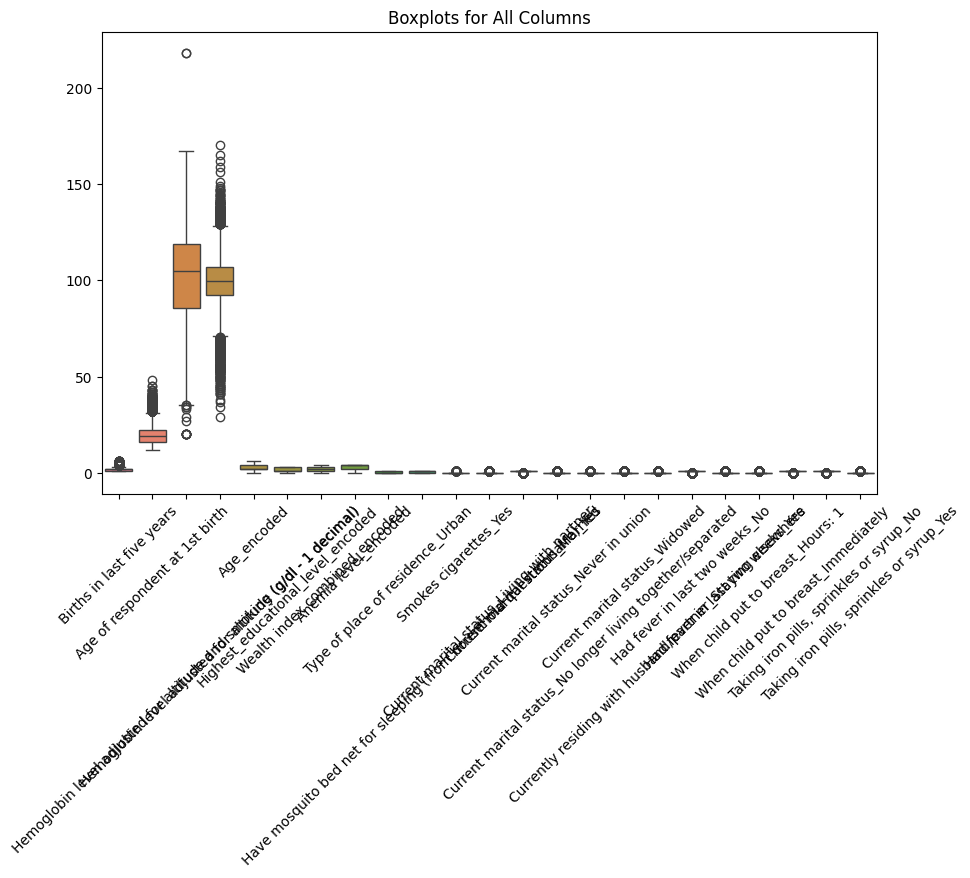

In [22]:
# Plotting boxplots for all columns to check the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots for All Columns")
plt.show()

In [24]:
# Function to replace outliers with the maximum non-outlier value in each column
def replace_outliers_with_max(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calculate Q1, Q3, and IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Find the max non-outlier value
            max_non_outlier = df[column][df[column] <= upper_bound].max()
            # Replace outliers with the max non-outlier value
            df[column] = np.where(df[column] > upper_bound, max_non_outlier, df[column])
            # Find the min non - outlier value
            min_non_outlier = df[column][df[column] >= lower_bound].min()
            df[column] = np.where(df[column] < lower_bound, min_non_outlier, df[column])

replace_outliers_with_max(df)

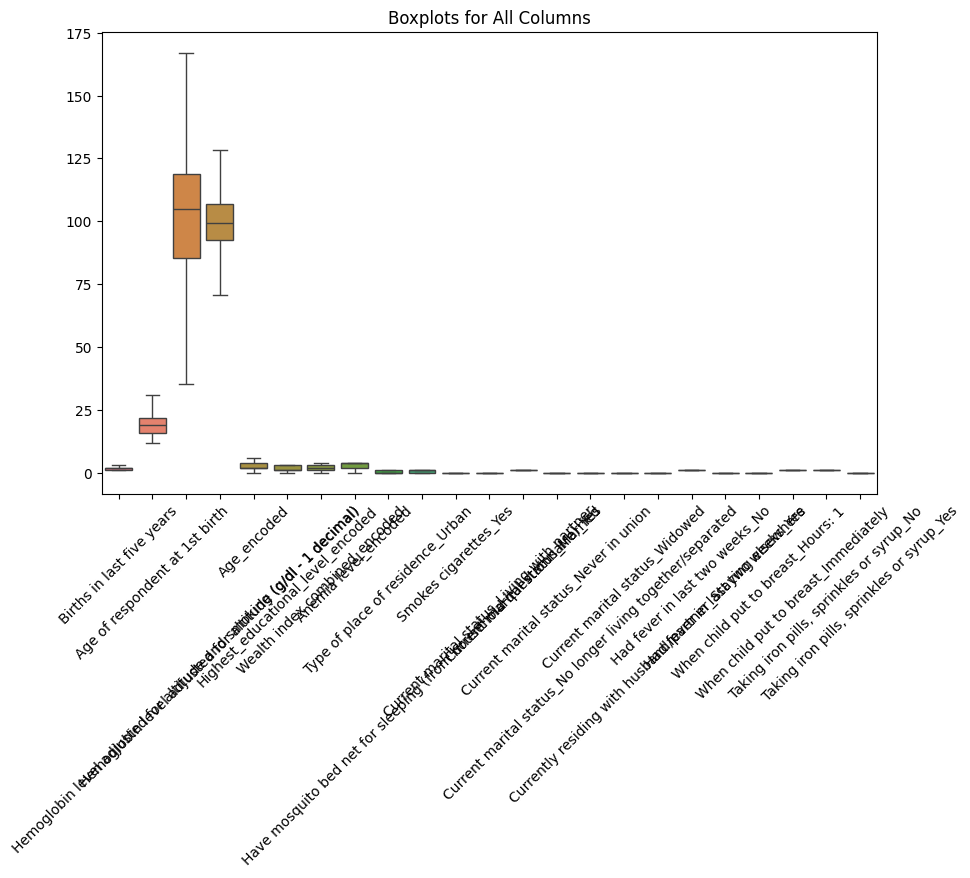

In [25]:
# Plotting boxplots for all columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots for All Columns")
plt.show()

4. DATA VISUALIZATION

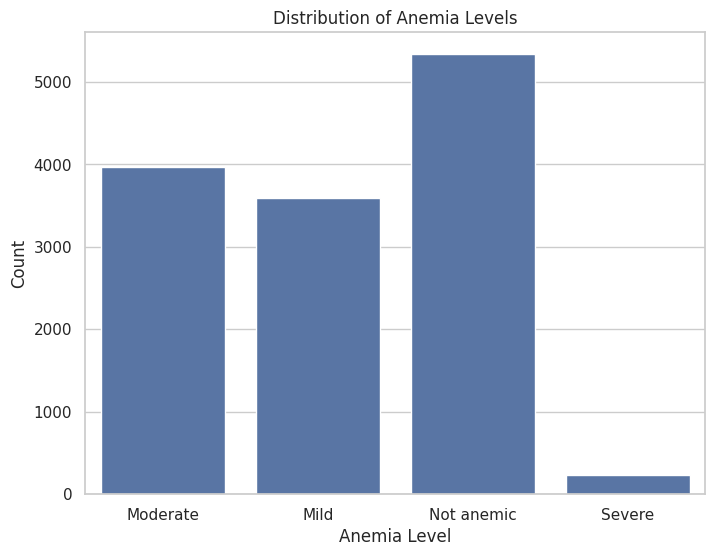

In [26]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# 1. Distribution of Anemia Levels
plt.figure(figsize=(8, 6))
sns.countplot(x="Anemia level", data=data_cleaned)
plt.title("Distribution of Anemia Levels")
plt.xlabel("Anemia Level")
plt.ylabel("Count")
plt.show()

**Summary:**

This bar chart illustrates the distribution of anemia levels among individuals. "Not anemic" is the most common category, followed by "Moderate" and "Mild" anemia, while "Severe" anemia cases are relatively rare. This suggests that most individuals fall within the non-anemic or mild-to-moderate anemia range.

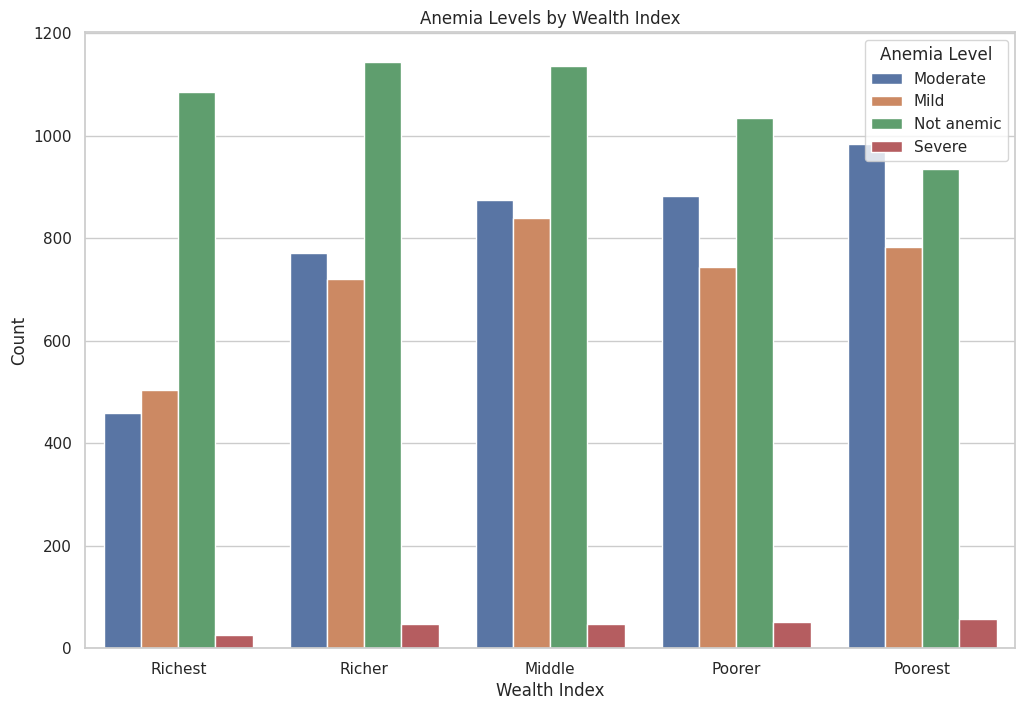

In [27]:
# Impact of Wealth on Anemia Levels
# Plot anemia distribution by wealth index
plt.figure(figsize=(12, 8))
sns.countplot(x="Wealth index combined", hue="Anemia level", data=data_cleaned)
plt.title("Anemia Levels by Wealth Index")
plt.xlabel("Wealth Index")
plt.ylabel("Count")
plt.legend(title="Anemia Level")
plt.show()

**Summary of the Impact of Wealth and Education on Anemia Levels**

The bar chart shows anemia levels across wealth groups, indicating higher "Not anemic" counts in wealthier groups. Moderate and mild anemia are more prevalent in poorer groups, while severe anemia remains relatively low across all groups. The chart suggests an inverse relationship between wealth and anemia severity.

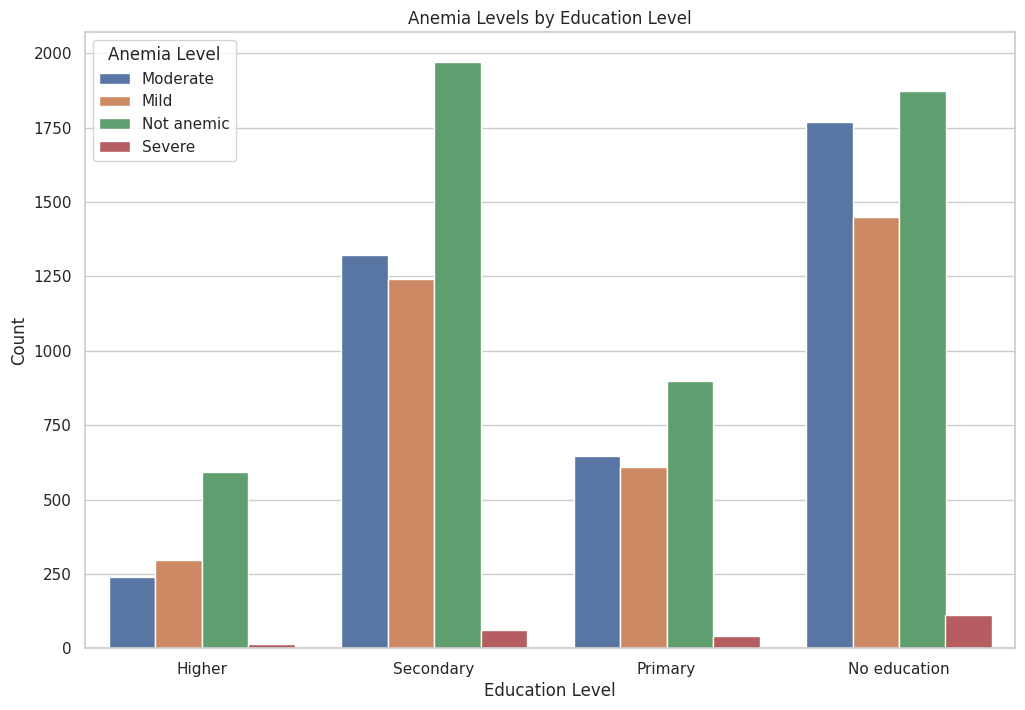

In [28]:
# Plot anemia distribution by educational level
plt.figure(figsize=(12, 8))
sns.countplot(x="Highest educational level", hue="Anemia level", data=data_cleaned)
plt.title("Anemia Levels by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Anemia Level")
plt.show()

**Summary of the anemia distribution by educational level**

This bar chart shows anemia levels by education level. "Not anemic" is most common among those with higher education, while moderate and mild anemia levels increase as education decreases. Those with no education show the highest counts of moderate and mild anemia. Severe anemia remains low across all education levels.








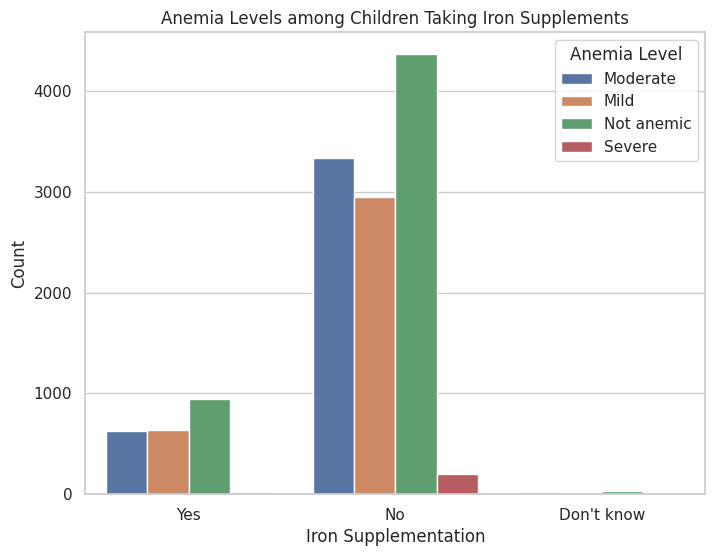

In [29]:
#Influence of Iron Supplementation on Anemia Levels
plt.figure(figsize=(8, 6))
sns.countplot(x="Taking iron pills, sprinkles or syrup", hue="Anemia level", data=data_cleaned)
plt.title("Anemia Levels among Children Taking Iron Supplements")
plt.xlabel("Iron Supplementation")
plt.ylabel("Count")
plt.legend(title="Anemia Level")
plt.show()

**Summary of the Influence of Iron Supplementation on Anemia Levels**

The bar chart shows anemia levels among children based on iron supplementation. Children not taking iron supplements have higher counts of moderate and mild anemia. "Not anemic" levels are also higher in this group, but anemia severity remains low across all groups, with minimal difference in the "Don't know" category.

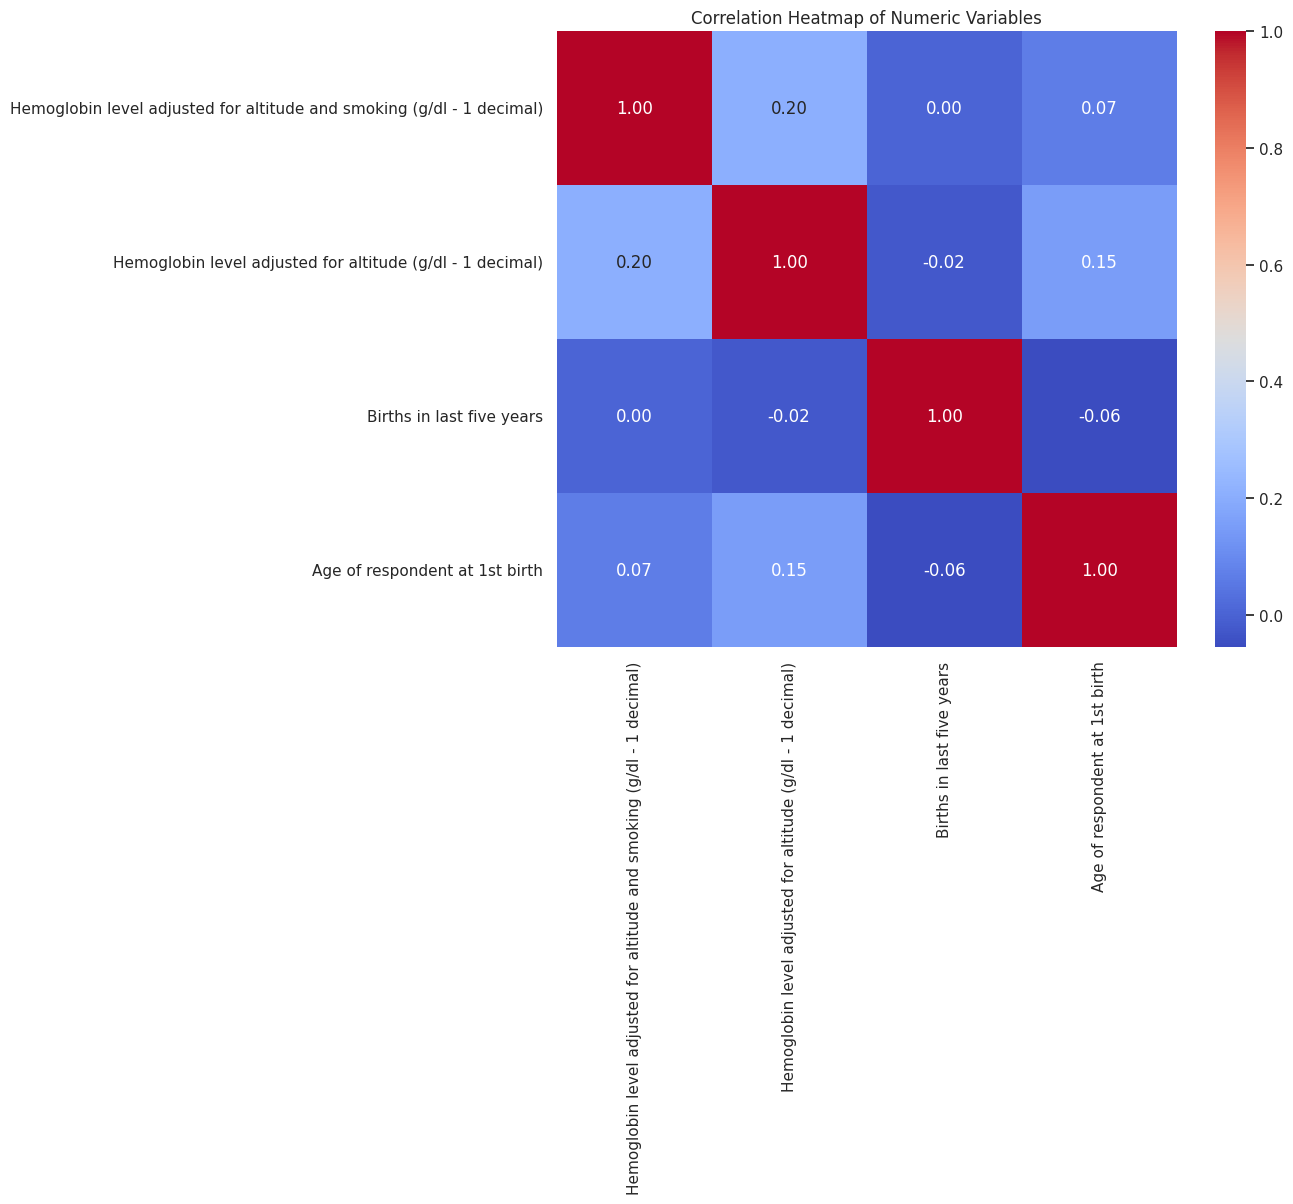

In [30]:
#Correlation Heatmap of Numeric Variables
plt.figure(figsize=(10, 8))
numeric_data = data[["Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)",
                             "Hemoglobin level adjusted for altitude (g/dl - 1 decimal)",
                             "Births in last five years",
                             "Age of respondent at 1st birth"]]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

**Summary of the Correlation Heatmap of Numeric Variables**

This correlation heatmap shows relationships among four variables: hemoglobin levels (adjusted for altitude and smoking, and for altitude alone), recent births, and age at first birth. Stronger correlations are represented by darker colors. The highest correlation is between hemoglobin levels adjusted for altitude and smoking, while other variables have low correlations.